<a href="https://colab.research.google.com/github/sehuiB/AI_Diary/blob/main/stable_diffusion_%EC%9D%B8%EC%83%81%EC%A3%BC%EC%9D%98_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델

### 모델 직접 학습




In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
print(torch.__version__)

2.5.1+cu121


In [ ]:
pip install diffusers["torch"]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
pip install accelerate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "/content/drive/My Drive/diffusers"

/content/drive/My Drive/diffusers


In [5]:
cd "/content/drive/My Drive"

/content/drive/My Drive


In [ ]:
#!git clone https://github.com/huggingface/diffusers


Cloning into 'diffusers'...
remote: Enumerating objects: 74115, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (198/198), done.
^C


In [ ]:
%cd diffusers
!pip install .

/content/drive/My Drive/diffusers/diffusers
Processing /content/drive/My Drive/diffusers/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2932781 sha256=fc7d7044a002f1b2b928931c8997f7061536f2c7bb25ea839df44ffda9df9742
  Stored in directory: /tmp/pip-ephem-wheel-cache-_lr5p1l2/wheels/20/e6/66/97ec1489106188144b1fa86a0e259419bb03249e4bbe1343d1
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [ ]:
%cd examples/text_to_image


/content/drive/My Drive/diffusers/diffusers/examples/text_to_image


In [ ]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: peft
    Found existing installation: peft 0.13.2
    Uninstalling peft-0.13.2:
      Successfully uninstalled peft-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is t

In [ ]:
!accelerate config default


accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
!pip install wandb


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


BLIP-2로 캡션 만들기

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
!git clone https://github.com/huggingface/transformers.git

Cloning into 'transformers'...
remote: Enumerating objects: 240596, done.
remote: Counting objects: 100% (368/368), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 240596 (delta 197), reused 268 (delta 157), pack-reused 240228 (from 1)
Receiving objects: 100% (240596/240596), 253.10 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (176047/176047), done.
Updating files: 100% (4738/4738), done.


In [ ]:
%cd transformers
!pip install -e .

[Errno 2] No such file or directory: 'transformers'
/content/drive/My Drive/diffusers/diffusers/examples/text_to_image
Obtaining file:///content/drive/MyDrive/diffusers/diffusers/examples/text_to_image
ERROR: file:///content/drive/MyDrive/diffusers/diffusers/examples/text_to_image does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@main

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-vuhswspl
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-vuhswspl
  Resolved https://github.com/huggingface/transformers.git to commit 13493215abceafc1653af88b045120014fb4c1fc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10052486 sha256=f2d4a4d0f88664eae0d19602f8328c8910db91de473984753fec8c78967393f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-qhwyd5gp/wheels/cf/59/82/6492402e887a68975030bf8c06532260abc16abb7ccd8127cc
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration,BlipForQuestionAnswering,Blip2Processor,BlipForConditionalGeneration
import torch
#processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [ ]:
from datasets import load_dataset

dataset = load_dataset("huggan/wikiart")
dataset

README.md:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

dataset_infos.json:   0%|          | 0.00/5.91k [00:00<?, ?B/s]

train-00000-of-00072.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

train-00001-of-00072.parquet:   0%|          | 0.00/518M [00:00<?, ?B/s]

train-00002-of-00072.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

train-00003-of-00072.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

train-00004-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00005-of-00072.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00006-of-00072.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

train-00007-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00008-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00009-of-00072.parquet:   0%|          | 0.00/531M [00:00<?, ?B/s]

train-00010-of-00072.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

train-00011-of-00072.parquet:   0%|          | 0.00/539M [00:00<?, ?B/s]

train-00012-of-00072.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

train-00013-of-00072.parquet:   0%|          | 0.00/555M [00:00<?, ?B/s]

train-00014-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00015-of-00072.parquet:   0%|          | 0.00/563M [00:00<?, ?B/s]

train-00016-of-00072.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00017-of-00072.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

train-00018-of-00072.parquet:   0%|          | 0.00/457M [00:00<?, ?B/s]

train-00019-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00020-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00021-of-00072.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

train-00022-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00023-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00024-of-00072.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

train-00025-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00026-of-00072.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00027-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00028-of-00072.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

train-00029-of-00072.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00030-of-00072.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00031-of-00072.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

train-00032-of-00072.parquet:   0%|          | 0.00/460M [00:00<?, ?B/s]

train-00033-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00034-of-00072.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00035-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00036-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00037-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00038-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00039-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00040-of-00072.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

train-00041-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00042-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00043-of-00072.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train-00044-of-00072.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

train-00045-of-00072.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00046-of-00072.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

train-00047-of-00072.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00048-of-00072.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00049-of-00072.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00050-of-00072.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00051-of-00072.parquet:   0%|          | 0.00/515M [00:00<?, ?B/s]

train-00052-of-00072.parquet:   0%|          | 0.00/514M [00:00<?, ?B/s]

train-00053-of-00072.parquet:   0%|          | 0.00/509M [00:00<?, ?B/s]

train-00054-of-00072.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

train-00055-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00056-of-00072.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

train-00057-of-00072.parquet:   0%|          | 0.00/405M [00:00<?, ?B/s]

train-00058-of-00072.parquet:   0%|          | 0.00/359M [00:00<?, ?B/s]

train-00059-of-00072.parquet:   0%|          | 0.00/304M [00:00<?, ?B/s]

train-00060-of-00072.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00061-of-00072.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

train-00062-of-00072.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

train-00063-of-00072.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

train-00064-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00065-of-00072.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

train-00066-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00067-of-00072.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

train-00068-of-00072.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

train-00069-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00070-of-00072.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00071-of-00072.parquet:   0%|          | 0.00/367M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/81444 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'artist', 'genre', 'style'],
        num_rows: 81444
    })
})

In [ ]:
import torch
import gc

torch.cuda.empty_cache()
gc.collect()

130

In [ ]:

from PIL import Image
from PIL import ImageDraw

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
 return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:

import torch
import gc

torch.cuda.empty_cache()
gc.collect()

24

In [ ]:

if((dataset['train'][0]['style'])==21):
  print('y')

y


In [ ]:
#사진 저장 (impressionism만)
path='/content/drive/MyDrive/ddata/image/test2'

# 이미지 폴더가 존재하지 않으면 생성
if not os.path.exists(path):
    os.makedirs(path)

from PIL import Image
for i in range(len(dataset['train'])):
  if ((dataset['train'][i]['style'])==12): #impressionism
    gc.collect()
    torch.cuda.empty_cache()
    img=dataset['train'][i]['image'].save(path+'/impressionism_{}.jpg'.format(i),'jpeg') #이미지 저장
    gc.collect()
    torch.cuda.empty_cache()


In [ ]:
import os
import pandas as pd

prompt = "a painting of"
caption=[]
img_name=[]

file_list=os.listdir('/content/drive/MyDrive/ddata/image/test2')

for i in range(len(file_list)):
  gc.collect()
  torch.cuda.empty_cache()

  #이미지 이름 저장
  img_name.append(file_list[i])

  #이미지 업로드
  img=Image.open('/content/drive/MyDrive/ddata/image/test2/'+file_list[i]).convert('RGB')
  img=img.resize((256,256))

  gc.collect()
  torch.cuda.empty_cache()

  inputs = processor(img, text=prompt, return_tensors="pt").to(device, torch.float16)
  generated_ids = model.generate(**inputs, max_new_tokens=600)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
  caption.append(generated_text)

  gc.collect()
  torch.cuda.empty_cache()

#이미지 이름과 caption저장
img_caption=pd.DataFrame({'image':img_name, 'text':caption})
img_caption

img_caption.to_csv('/content/drive/MyDrive/ddata/impression_img_caption.csv',index=False)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Both `max_new_tokens` (=600) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=600) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=600) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=600) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/e

In [ ]:
img_caption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13060 entries, 0 to 13059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   13060 non-null  object
 1   text    13060 non-null  object
dtypes: object(2)
memory usage: 204.2+ KB


In [ ]:
img_caption['text'].isnull().sum()

0

In [ ]:
from glob import glob
import os
import pandas as pd
import json
#from googletrans import Translator
import shutil
from PIL import Image

In [ ]:
import os
from PIL import Image
img_name=os.listdir('/content/drive/MyDrive/ddata/image/test2')
test_image='/content/drive/MyDrive/ddata/Sample/test_image/'

## 출력 폴더가 존재하지 않으면 생성
#if not os.path.exists(test_image):
#    os.makedirs(test_image)
for i in range(len(img_name)):
  img=Image.open('/content/drive/MyDrive/ddata/image/test2/'+img_name[i])
  img.save(test_image+img_name[i],'jpeg')

In [ ]:
#허깅페이스에 데이터셋 올리기
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
The token `uhuihui` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pu

In [ ]:
from datasets import load_dataset
dataset1 = load_dataset("uhuihui5/impressionism_img_cap")
dataset1

impression_img_caption.csv:   0%|          | 0.00/927k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 13060
    })
})

파인튜닝 학습 - 약 16시간 넘게 소요

In [8]:
from PIL import Image

In [2]:
!CUDA_VISIBLE_DEVICES="0" accelerate launch train_text_to_image_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --dataset_name="uhuihui5/img_caption_impressionism" --caption_column="text" \
  --resolution=512 --random_flip \
  --train_batch_size=1 \
  --num_train_epochs=30 --checkpointing_steps=10000 \
  --learning_rate=1e-04 --lr_scheduler="cosine" --lr_warmup_steps=0 \
  --seed=42 \
  --output_dir="/content/drive/MyDrive/sd_model_fintuning_LoRA/fintune_model2" \
  --validation_prompt="impressionism, oil painting with brushstrokes, oil painting, peaceful and relaxed atmosphere,mother and child with dog enjoying a walk together, park stroll,  happy and content expression, warm and soft lighting, bright and sunny day in a park, cheerful interactions, heartwarming moments, vibrant but soft colors "  --report_to="wandb"

Traceback (most recent call last):
  File "/usr/local/bin/accelerate", line 5, in <module>
    from accelerate.commands.accelerate_cli import main
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/accelerate_cli.py", line 19, in <module>
    from accelerate.commands.estimate import estimate_command_parser
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/estimate.py", line 34, in <module>
    import timm
  File "/usr/local/lib/python3.10/dist-packages/timm/__init__.py", line 2, in <module>
    from .layers import is_scriptable, is_exportable, set_scriptable, set_exportable
  File "/usr/local/lib/python3.10/dist-packages/timm/layers/__init__.py", line 8, in <module>
    from .classifier import create_classifier, ClassifierHead, NormMlpClassifierHead, ClNormMlpClassifierHead
  File "/usr/local/lib/python3.10/dist-packages/timm/layers/classifier.py", line 15, in <module>
    from .create_norm import get_norm_layer
  File "/usr/local/lib/python3.10/dist-

프롬프트 실험 및 결과 확인

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (111 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', warm and soft lighting , looks like drawn by a child , simple , happy face , happy face , illustration minimalism , pastel colors , simple eyes , nouse , mouth']


  0%|          | 0/30 [00:00<?, ?it/s]

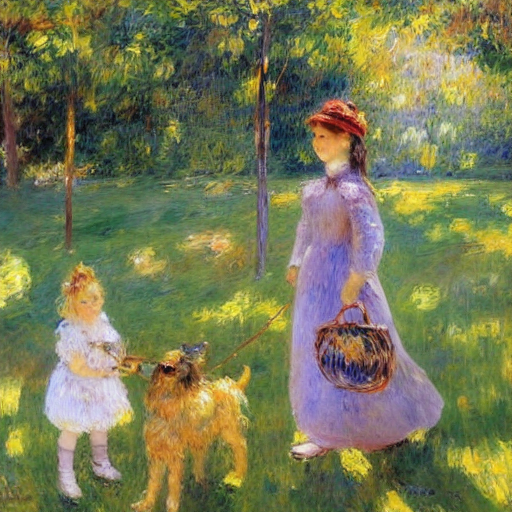

In [13]:
from diffusers import StableDiffusionPipeline
import torch
import os

model_path = os.listdir('/content/drive/MyDrive/sd_model_fintuning_LoRA/fintune_model2')[-1] #FineTuning Model Path
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.unet.load_attn_procs('/content/drive/MyDrive/sd_model_fintuning_LoRA/fintune_model2/'+model_path)
pipe.to("cuda")

prompt_list = [
    "((impressionism, oil painting with brushstrokes, oil painting,))",
    "child with medium-length hair, wearing glasses",
    "young child and mother walking a small, happy dog together",
    "bright and sunny day in a park",
    "vibrant but soft colors",
    "happy, expressive, simple faces on child, mother, and dog",
    "whimsical and innocent atmosphere",
    "childlike, hand-drawn style",
    "warm and soft lighting",
    "looks like drawn by a child",
    "simple, happy face",
    "happy face",
    "illustration minimalism",
    "pastel colors",
    "simple eyes, nouse, mouth"

]

negative_prompt_list = [
    'lowres',
    '(bad anatomy, bad hands:1.1)',
    'blurry face',
    'text',
    'error',
    'missing fingers',
    'missing face',
    'extra digit',
    'fewer digits',
    'cropped',
    'worst quality',
    'low quality',
    'normal quality',
    'jpeg artifacts',
    'signature',
    'watermark',
    'username',
    'blurry',
    'artist name',
    'b&w',
    'weird colors',
    '(bad art, poorly drawn, close up, blurry:1.5)',
    '(disfigured, deformed, extra limbs:1.5)',
    '(realisticsemi realistic)',
    '(surreal)'

]

prompt = ', '.join(prompt_list)
negative_prompt = ', '.join(negative_prompt_list)


image = pipe(prompt, negative_prompt =negative_prompt, num_inference_steps=30, guidance_scale=7.5).images[0]
#image.save("/content/drive/MyDrive/sd_model_fintuning_LoRA/image/tfimagetest.png")
image

윤곽선 잘 나오는 지 테스트

In [15]:
import cv2
import numpy as np
from google.colab import files

def generate_outline(image_path, output_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # 이미지를 흑백처리
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러- 노이즈 감소
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Canny Edge Detection으로 선 검출
    edges = cv2.Canny(blurred_image, threshold1=50, threshold2=100)

    # 결과 이미지 반전 (배경을 흰색으로)
    outline_image = cv2.bitwise_not(edges)

    # 결과 저장
    cv2.imwrite(output_path, outline_image)

    # 구글 코랩에서 결과 다운로드 제공
    files.download(output_path)

# 경로 설정 및 함수 호출
uploaded = files.upload()  # 사용자가 이미지를 업로드하도록 요청
input_image_path = list(uploaded.keys())[0]  # 업로드한 이미지 파일 이름 가져오기
output_image_path = '/content/drive/MyDrive/ddata/Sample/outline_image1.png'  # 결과 이미지 저장 경로
generate_outline(input_image_path, output_image_path)

Saving 이미지.png to 이미지 (1).png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>